In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from pandas_ml import ConfusionMatrix
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn import svm
print(__doc__)

Automatically created module for IPython interactive environment


In [59]:
base_data=pd.read_csv('D:/Freelancer_questions/excel_python_replication/Segment_classification/Customers2.csv')

In [60]:
base_data.head()

,CustomerID,Genre,Age,Annual Income (€K),Spending Score
0,23453456,Male,20,15,39
1,23453457,Male,20,15,81
2,23453458,Female,21,16,6
3,23453459,Female,23,16,77
4,23453460,Female,655,17,40


In [61]:
#converting the age variables to dummy variables#
#creating dummy codes for the caegorical variables#
New_base=pd.get_dummies(base_data, columns=["Genre"], prefix=["Gender"])

In [62]:
New_base.head()

,CustomerID,Age,Annual Income (€K),Spending Score,Gender_Female,Gender_Male
0,23453456,20,15,39,0,1
1,23453457,20,15,81,0,1
2,23453458,21,16,6,1,0
3,23453459,23,16,77,1,0
4,23453460,655,17,40,1,0


In [63]:
New_base.columns

Index(['CustomerID', 'Age', 'Annual Income (€K)', 'Spending Score ',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [64]:
#subsetting the data for clustering##
cluster_data=New_base[[ 'Age', 'Annual Income (€K)', 'Spending Score ','Gender_Female', 'Gender_Male']]

In [43]:
cluster_data.head()

,Age,Annual Income (€K),Spending Score,Gender_Female,Gender_Male
0,20,15,39,0,1
1,20,15,81,0,1
2,21,16,6,1,0
3,23,16,77,1,0
4,655,17,40,1,0


In [65]:
#checking the optimal number of clusters using silhouette method#
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(cluster_data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(cluster_data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.9148914125226576
For n_clusters=3, The Silhouette Coefficient is 0.29292304245644535
For n_clusters=4, The Silhouette Coefficient is 0.3796517214408109
For n_clusters=5, The Silhouette Coefficient is 0.3881391571756269
For n_clusters=6, The Silhouette Coefficient is 0.4593309699231937
For n_clusters=7, The Silhouette Coefficient is 0.4560506413639429
For n_clusters=8, The Silhouette Coefficient is 0.44447521673072626
For n_clusters=9, The Silhouette Coefficient is 0.43421924058447803
For n_clusters=10, The Silhouette Coefficient is 0.4166831281590403


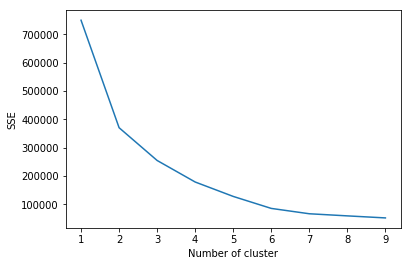

In [66]:
#elbow curve for identifying the cluster number#
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(cluster_data)
    cluster_data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [68]:
#getting optimal number of cluster as 6 from both the above methods
#clustering the data based on Annual Income/Spending Sore/ Gender
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters)

%time km.fit(cluster_data)

clusters = km.labels_.tolist()

Wall time: 26.9 ms


In [69]:
#appending the unsupervised tags to the base data#
cluster_data['clusters']=clusters
cluster_data.head()

,Age,Annual Income (€K),Spending Score,Gender_Female,Gender_Male,clusters
0,20,15,39,0,1,2
1,20,15,81,0,1,2
2,21,16,6,1,0,2
3,23,16,77,1,0,2
4,655,17,40,1,0,1


In [70]:
#converting the k means labels to categories#
cluster_data["category"] = np.where(cluster_data['clusters']==0, 'zero',(np.where(cluster_data['clusters']==1,'one','others')))

In [23]:
cluster_data.columns

Index(['Age', 'Annual Income (€K)', 'Spending Score ', 'Gender_Female',
       'Gender_Male', 'clusters', 'category'],
      dtype='object')

In [71]:
X=cluster_data[['Age', 'Annual Income (€K)', 'Spending Score ', 'Gender_Female','Gender_Male']]
y=cluster_data['category']

In [72]:
#dividing the data in training and test#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
#create model on the training data#
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf=clf.fit(X_train, y_train)
#predicitng based on rf model for training data
Predicted_risk=clf.predict(X_train)
cm = ConfusionMatrix(y_train, Predicted_risk)
cm.print_stats()

Confusion Matrix:

Predicted  one  others  zero  __all__
Actual                               
one          0       1     0        1
others       0     121    18      139
zero         0      12     3       15
__all__      0     134    21      155


Overall Statistics:

Accuracy: 0.8
95% CI: (0.7282920581447612, 0.8598800464327158)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9905456560279955
Kappa: 0.05487804878048825
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       one     others       zero
Population                                    155        155        155
P: Condition positive                           1        139         15
N: Condition negative                         154         16        140
Test outcome positive                           0        134         21
Test outcome negative                         155         21        134
TP: True Positive                               0        121          3
TN: True Negative   

C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN + self.FP) * (self.TN + self.FN)))
C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:332: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


In [74]:
#predicitng based on rf model for test data
Predicted_risk_test=clf.predict(X_test)
cm1 = ConfusionMatrix(y_test, Predicted_risk_test)
cm1.print_stats()

population: 13
P: 0
N: 13
PositiveTest: 1
NegativeTest: 12
TP: 0
TN: 12
FP: 1
FN: 0
TPR: nan
TNR: 0.9230769230769231
PPV: 0.0
NPV: 1.0
FPR: 0.07692307692307693
FDR: 1.0
FNR: nan
ACC: 0.9230769230769231
F1_score: 0.0
MCC: nan
informedness: nan
markedness: 0.0
prevalence: 0.0
LRP: nan
LRN: nan
DOR: nan
FOR: 0.0


C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:191: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.P)
C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:276: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FN) / self.P)
C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN + self.FP) * (self.TN + self.FN)))


# we have got close to 92%accuracy on test set based on 4 clusters#

In [83]:
 from sklearn import svm
#SVM model training data #
clf = svm.SVC(kernel='linear', gamma=1)
clf.fit(X_train, y_train)
Predicted_risk=clf.predict(X_train)
cm = ConfusionMatrix(y_train, Predicted_risk)
cm.print_stats()


Confusion Matrix:

Predicted  one  others  zero  __all__
Actual                               
one          0       1     0        1
others       1     119    19      139
zero         0      12     3       15
__all__      1     132    22      155


Overall Statistics:

Accuracy: 0.7870967741935484
95% CI: (0.7142040762523915, 0.8486855490897706)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.988459925550243
Kappa: 0.04320987654320974
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       one     others       zero
Population                                    155        155        155
P: Condition positive                           1        139         15
N: Condition negative                         154         16        140
Test outcome positive                           1        132         22
Test outcome negative                         154         23        133
TP: True Positive                               0        119          3
TN: Tr

In [84]:
#predicitng based on rf model for test data
Predicted_risk_test=clf.predict(X_test)
cm1 = ConfusionMatrix(y_test, Predicted_risk_test)
cm1.print_stats()

population: 13
P: 0
N: 13
PositiveTest: 2
NegativeTest: 11
TP: 0
TN: 11
FP: 2
FN: 0
TPR: nan
TNR: 0.8461538461538461
PPV: 0.0
NPV: 1.0
FPR: 0.15384615384615385
FDR: 1.0
FNR: nan
ACC: 0.8461538461538461
F1_score: 0.0
MCC: nan
informedness: nan
markedness: 0.0
prevalence: 0.0
LRP: nan
LRN: nan
DOR: nan
FOR: 0.0


C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:191: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.P)
C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:276: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FN) / self.P)
C:\Users\ragha\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN + self.FP) * (self.TN + self.FN)))
